In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px

In [65]:
df = pd.read_csv("socialMedia.csv")


## DATA DESCRIPTION AND INFO


In [66]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [ ]:
a  = df['Avg_Daily_Usage_Hours'] > df['Sleep_Hours_Per_Night']
df[a]

In [82]:
a = df['Addicted_Score'] > 7
df_addicted = df[a]
df_addicted

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
5,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9
7,8,20,Female,Undergraduate,Brazil,5.8,Snapchat,Yes,6.0,6,In Relationship,2,8
11,12,20,Female,Undergraduate,Spain,5.5,TikTok,Yes,5.8,6,In Relationship,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,695,20,Female,Undergraduate,Turkey,6.6,Instagram,Yes,6.1,5,Single,4,8
696,697,21,Female,Undergraduate,Mexico,6.3,TikTok,Yes,6.2,5,Single,4,8
699,700,22,Male,Graduate,UK,6.2,Twitter,Yes,6.3,5,Single,4,8
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9


In [ ]:
df["Relationship_Status"].value_counts()

## MAP

In [14]:

# European countries with coordinates
EUROPEAN_COORDS = {
    'Albania': (41.15, 20.17), 'Austria': (47.52, 14.55), 'Belarus': (53.71, 27.95),
    'Belgium': (50.85, 4.35), 'Bosnia and Herzegovina': (43.92, 17.68),
    'Bulgaria': (42.73, 25.49), 'Croatia': (45.10, 15.20), 'Cyprus': (35.13, 33.43),
    'Czech Republic': (49.82, 15.47), 'Czechia': (49.82, 15.47),
    'Denmark': (56.26, 9.50), 'Estonia': (58.60, 25.01), 'Finland': (61.92, 25.75),
    'France': (46.23, 2.21), 'Germany': (51.17, 10.45), 'Greece': (39.07, 21.82),
    'Hungary': (47.16, 19.50), 'Iceland': (64.96, -19.02), 'Ireland': (53.14, -7.69),
    'Italy': (41.87, 12.57), 'Kosovo': (42.60, 20.90), 'Latvia': (56.88, 24.60),
    'Lithuania': (55.17, 23.88), 'Luxembourg': (49.82, 6.13), 'Malta': (35.94, 14.38),
    'Moldova': (47.41, 28.37), 'Montenegro': (42.71, 19.37), 'Netherlands': (52.13, 5.29),
    'North Macedonia': (41.51, 21.45), 'Norway': (60.47, 8.47), 'Poland': (51.92, 19.15),
    'Portugal': (39.40, -8.22), 'Romania': (45.94, 24.97), 'Russia': (55.76, 37.62),
    'Serbia': (44.02, 21.01), 'Slovakia': (48.67, 19.70), 'Slovenia': (46.15, 14.99),
    'Spain': (40.46, -3.75), 'Sweden': (60.13, 18.64), 'Switzerland': (46.82, 8.23),
    'Turkey': (39.93, 32.86), 'Ukraine': (48.38, 31.17), 'United Kingdom': (55.38, -3.44),
    'UK': (55.38, -3.44),
}

# Platform colors (customize as needed)
PLATFORM_COLORS = {
    'Facebook':   '#1877F2',
    'Instagram':  '#E4405F',
    'TikTok':     '#010101',
    'WhatsApp':   '#25D366',
    'YouTube':    '#FF0000',
    'Twitter':    '#1DA1F2',
    'X':          '#000000',
    'Snapchat':   '#FFFC00',
    'LinkedIn':   '#0A66C2',
    'Telegram':   '#0088CC',
    'Pinterest':  '#E60023',
    'VKontakte':  '#0077FF',
    'VK':         '#0077FF',
    'WeChat':     '#09B83E',
    'LINE':       '#00C300',
    'KakaoTalk':  '#FFE812',
}

EUROPEAN_ISO = {
    'Albania': 'ALB', 'Austria': 'AUT', 'Belarus': 'BLR', 'Belgium': 'BEL',
    'Bosnia and Herzegovina': 'BIH', 'Bulgaria': 'BGR', 'Croatia': 'HRV',
    'Cyprus': 'CYP', 'Czech Republic': 'CZE', 'Czechia': 'CZE', 'Denmark': 'DNK',
    'Estonia': 'EST', 'Finland': 'FIN', 'France': 'FRA', 'Germany': 'DEU',
    'Greece': 'GRC', 'Hungary': 'HUN', 'Iceland': 'ISL', 'Ireland': 'IRL',
    'Italy': 'ITA', 'Kosovo': 'XKX', 'Latvia': 'LVA', 'Lithuania': 'LTU',
    'Luxembourg': 'LUX', 'Malta': 'MLT', 'Moldova': 'MDA', 'Montenegro': 'MNE',
    'Netherlands': 'NLD', 'North Macedonia': 'MKD', 'Norway': 'NOR', 'Poland': 'POL',
    'Portugal': 'PRT', 'Romania': 'ROU', 'Russia': 'RUS', 'Serbia': 'SRB',
    'Slovakia': 'SVK', 'Slovenia': 'SVN', 'Spain': 'ESP', 'Sweden': 'SWE',
    'Switzerland': 'CHE', 'Turkey': 'TUR', 'Ukraine': 'UKR',
    'United Kingdom': 'GBR', 'UK': 'GBR',
}




def create_europe_social_media_map(df, country_col='Country', platform_col='Platform', 
                                    users_col='Users', top_n=3, title='Top 3 Social Media in Europe'):
    """
    Create a concentric bubble map for European social media usage.
    """
    
    # 1. Filter European countries only
    european_countries = list(EUROPEAN_COORDS.keys())
    df_europe = df[df[country_col].isin(european_countries)].copy()
    
    # 2. Count users per country-platform (aggregate if needed)
    df_agg = df_europe.groupby([country_col, platform_col]).size().reset_index(name='count')
    
    # 3. Get top N platforms per country
    df_top = (df_agg.groupby(country_col, group_keys=False)
              .apply(lambda x: x.nlargest(top_n, 'count'))
              .reset_index(drop=True))
    
    # 4. Add rank (1 = most users, 2 = second, etc.)
    df_top['Rank'] = df_top.groupby(country_col).cumcount() + 1
    
    # 5. Add coordinates
    df_top['lat'] = df_top[country_col].map(lambda x: EUROPEAN_COORDS.get(x, (None, None))[0])
    df_top['lon'] = df_top[country_col].map(lambda x: EUROPEAN_COORDS.get(x, (None, None))[1])
    df_top = df_top.dropna(subset=['lat', 'lon'])
    
    # 6. Calculate bubble sizes (rank 1 = largest circle)
    max_count = df_top['count'].max()
    base_sizes = {1: 50, 2: 35, 3: 20}
    df_top['size'] = df_top.apply(
        lambda r: base_sizes.get(r['Rank'], 15) * (r['count'] / max_count) ** 0.3, axis=1
    )
    df_top['size'] = df_top['size'].clip(lower=8)
    
    # 7. Track which platforms have been added to legend
    platforms_in_legend = set()
    
    # 8. Create figure
    fig = go.Figure()
    
    # Draw largest circles first (rank 1), then smaller on top
    for rank in sorted(df_top['Rank'].unique(), reverse=False):
        rank_data = df_top[df_top['Rank'] == rank]
        
        for platform in rank_data[platform_col].unique():
            platform_data = rank_data[rank_data[platform_col] == platform]
            color = PLATFORM_COLORS.get(platform, '#888888')
            
            # Determine if we should show this platform in legend (only first occurrence)
            show_in_legend = platform not in platforms_in_legend
            if show_in_legend:
                platforms_in_legend.add(platform)
            
            fig.add_trace(go.Scattergeo(
                lon=platform_data['lon'].tolist(),
                lat=platform_data['lat'].tolist(),
                text=[f"{row[country_col]}<br>{platform}<br>{row['count']:,} users<br>Rank {row['Rank']}" 
                      for _, row in platform_data.iterrows()],
                hoverinfo='text',
                marker=dict(
                    size=platform_data['size'].tolist(),
                    color=color,
                    line=dict(width=1.5, color='white'),
                    opacity=0.9,
                ),
                name=platform,
                legendgroup=platform,
                showlegend=show_in_legend,  # Fixed: now a regular Python bool
            ))
    
    # 9. Layout
    fig.update_layout(
        title=dict(text=title, x=0.5, font=dict(size=18)),
        showlegend=True,
        legend=dict(yanchor="top", y=0.98, xanchor="left", x=0.01, bgcolor="rgba(255,255,255,0.8)"),
        geo=dict(
            scope='europe',
            resolution=50,
            showland=True, landcolor='rgb(235, 235, 235)',
            showocean=True, oceancolor='rgb(255, 255, 255)',
            showcountries=True, countrycolor='rgb(200, 200, 200)',
            showcoastlines=True, coastlinecolor='rgb(180, 180, 180)',
            center=dict(lat=54, lon=15),
            lonaxis=dict(range=[-25, 45]),
            lataxis=dict(range=[34, 72]),
        ),
        margin=dict(l=0, r=0, t=50, b=0),
        width=1000, height=800,
    )
    
    return fig


def create_europe_choropleth(df, country_col='Country', platform_col='Platform',
                              title='Most Used Social Media Platform in Europe'):
    """
    Create a choropleth map showing the #1 social media platform per European country.
    """
    
    # 1. Filter European countries only
    european_countries = list(EUROPEAN_ISO.keys())
    df_europe = df[df[country_col].isin(european_countries)].copy()
    
    # 2. Count occurrences per country-platform
    df_agg = df_europe.groupby([country_col, platform_col]).size().reset_index(name='count')
    
    # 3. Get the #1 platform per country
    df_top1 = df_agg.loc[df_agg.groupby(country_col)['count'].idxmax()].reset_index(drop=True)
    
    # 4. Add ISO codes
    df_top1['iso_alpha'] = df_top1[country_col].map(EUROPEAN_ISO)
    df_top1 = df_top1.dropna(subset=['iso_alpha'])
    
    # 5. Get unique platforms and assign colors
    platforms = df_top1[platform_col].unique().tolist()
    color_map = {p: PLATFORM_COLORS.get(p, '#888888') for p in platforms}
    
    # 6. Create choropleth
    fig = px.choropleth(
        df_top1,
        locations='iso_alpha',
        color=platform_col,
        hover_name=country_col,
        hover_data={'count': True, platform_col: True, 'iso_alpha': False},
        color_discrete_map=color_map,
        title=title,
    )
    
    # 7. Focus on Europe
    fig.update_geos(
        scope='europe',
        resolution=50,
        showland=True, landcolor='rgb(235, 235, 235)',
        showocean=True, oceancolor='rgb(255, 255, 255)',
        showcountries=True, countrycolor='rgb(180, 180, 180)',
        showcoastlines=True, coastlinecolor='rgb(150, 150, 150)',
        center=dict(lat=54, lon=15),
        lonaxis=dict(range=[-25, 45]),
        lataxis=dict(range=[34, 72]),
    )
    
    # 8. Layout
    fig.update_layout(
        title=dict(text=title, x=0.5, font=dict(size=20)),
        legend=dict(
            title='Platform',
            yanchor="top", y=0.98,
            xanchor="left", x=0.01,
            bgcolor="rgba(255,255,255,0.8)"
        ),
        margin=dict(l=0, r=0, t=60, b=0),
        width=1000, height=800,
    )
    
    return fig




# Create the map


In [ ]:
fig = create_europe_social_media_map(
    df,
    country_col='Country',              # Your country column
    platform_col='Most_Used_Platform',  # Your platform column
    top_n=3,
    title='Top 3 Social Media Platforms in Europe'
)

fig.show()

In [15]:
# Create the choropleth map
fig = create_europe_choropleth(
    df,
    country_col='Country',
    platform_col='Most_Used_Platform',
    title='Most Used Social Media Platform in Europe'
)

fig.show()

In [9]:
def create_europe_choropleth(df, country_col='Country', platform_col='Platform',
                              title='Most Used Social Media Platform in Europe'):
    """
    Create a choropleth map showing the #1 social media platform per European country.
    """
    
    # 1. Filter European countries only
    european_countries = list(EUROPEAN_ISO.keys())
    df_europe = df[df[country_col].isin(european_countries)].copy()
    
    # 2. Count occurrences per country-platform
    df_agg = df_europe.groupby([country_col, platform_col]).size().reset_index(name='count')
    
    # 3. Get the #1 platform per country
    df_top1 = df_agg.loc[df_agg.groupby(country_col)['count'].idxmax()].reset_index(drop=True)
    
    # 4. Add ISO codes
    df_top1['iso_alpha'] = df_top1[country_col].map(EUROPEAN_ISO)
    df_top1 = df_top1.dropna(subset=['iso_alpha'])
    
    # 5. Get unique platforms and assign colors
    platforms = df_top1[platform_col].unique().tolist()
    color_map = {p: PLATFORM_COLORS.get(p, '#888888') for p in platforms}
    
    # 6. Create choropleth
    fig = px.choropleth(
        df_top1,
        locations='iso_alpha',
        color=platform_col,
        hover_name=country_col,
        hover_data={'count': True, platform_col: True, 'iso_alpha': False},
        color_discrete_map=color_map,
        title=title,
    )
    
    # 7. Focus on Europe
    fig.update_geos(
        scope='europe',
        resolution=50,
        showland=True, landcolor='rgb(235, 235, 235)',
        showocean=True, oceancolor='rgb(255, 255, 255)',
        showcountries=True, countrycolor='rgb(180, 180, 180)',
        showcoastlines=True, coastlinecolor='rgb(150, 150, 150)',
        center=dict(lat=54, lon=15),
        lonaxis=dict(range=[-25, 45]),
        lataxis=dict(range=[34, 72]),
    )
    
    # 8. Layout
    fig.update_layout(
        title=dict(text=title, x=0.5, font=dict(size=20)),
        legend=dict(
            title='Platform',
            yanchor="top", y=0.98,
            xanchor="left", x=0.01,
            bgcolor="rgba(255,255,255,0.8)"
        ),
        margin=dict(l=0, r=0, t=60, b=0),
        width=1000, height=800,
    )
    
    return fig


# =============================================================================
# USAGE
# =============================================================================

# Create the choropleth map
fig = create_europe_choropleth(
    df,
    country_col='Country',
    platform_col='Most_Used_Platform',
    title='Most Used Social Media Platform in Europe'
)

fig.show()

NameError: name 'EUROPEAN_ISO' is not defined

## MORE DATA 

Relationship_Status
Single             384
In Relationship    289
Complicated         32
Name: count, dtype: int64

## Heatmap

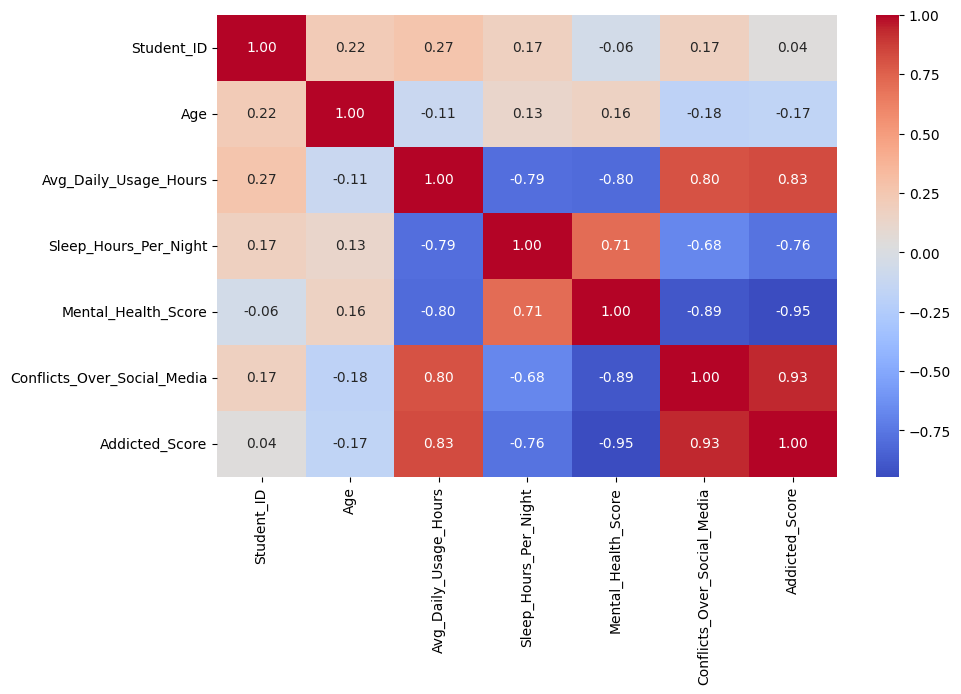

In [14]:
# Assume df is your DataFrame
numeric_df = df.select_dtypes(include='number')  # keep only numerical columns

corr = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Index(['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')


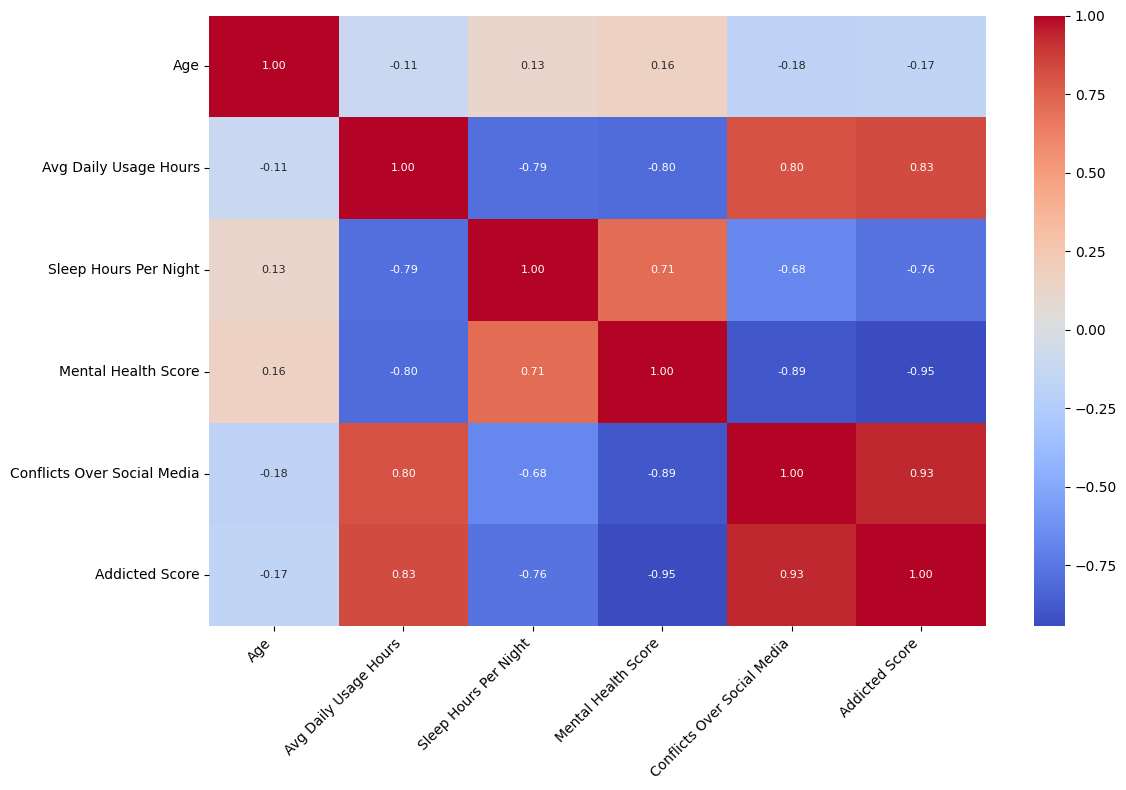

In [16]:
# Assume df is your DataFrame
numeric_df = df.select_dtypes(include='number')  # keep only numerical columns
numeric_df = numeric_df.drop(columns=['Student_ID'])
print(numeric_df.columns)
numeric_df = numeric_df.rename(columns=lambda x: x.replace('_', ' ').title())
corr = numeric_df.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f',
            annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()


## Chords graph

In [42]:
import plotly.graph_objects as go
import numpy as np

# ------------------------------------------------------------------------
# Prepare your data (df must exist with a 'Student_ID' column)
# ------------------------------------------------------------------------
numeric_df = df.select_dtypes(include='number')
numeric_df = numeric_df.drop(columns=['Student_ID'])
numeric_df = numeric_df.rename(columns=lambda x: x.replace('_', ' ').title())
corr = numeric_df.corr()

labels = corr.columns.tolist()
corr_matrix = corr.values
n = len(labels)

# Threshold for showing correlations
threshold = 0.3

# Create chord diagram data
source = []
target = []
value = []
colors = []

# Color palette (now slightly transparent)
arc_colors = [
    'rgba(224,122,95,0.85)', 'rgba(61,64,91,0.85)', 'rgba(129,178,154,0.85)',
    'rgba(242,204,143,0.85)', 'rgba(94,96,206,0.85)', 'rgba(72,202,228,0.85)',
    'rgba(244,162,97,0.85)', 'rgba(42,157,143,0.85)', 'rgba(231,111,81,0.85)',
    'rgba(38,70,83,0.85)'
]

# Build edges based on correlation threshold
for i in range(n):
    for j in range(i + 1, n):
        corr_val = corr_matrix[i, j]
        if abs(corr_val) >= threshold:
            source.append(i)
            target.append(j)
            value.append(abs(corr_val))
            # Red-ish for negative, green-ish for positive; alpha scales with |corr|
            if corr_val < 0:
                colors.append(f'rgba(230, 57, 70, {0.3 + abs(corr_val) * 0.5})')
            else:
                colors.append(f'rgba(129, 178, 154, {0.3 + abs(corr_val) * 0.5})')

# ------------------------------------------------------------------------
# Create the chord diagram using Plotly
# ------------------------------------------------------------------------
fig = go.Figure()

# Positions on a circle for nodes
angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
radius = 1.0
chord_radius = 0.9  # avoids overlapping dots

x_pos = radius * np.cos(angles)
y_pos = radius * np.sin(angles)

# Draw nodes (arcs as points + labels)
for i, label in enumerate(labels):
    fig.add_trace(go.Scatter(
        x=[x_pos[i]],
        y=[y_pos[i]],
        mode='markers+text',
        marker=dict(size=22, color=arc_colors[i % len(arc_colors)], line=dict(color='white', width=0.5)),
        text=[label],
        textposition='top center' if y_pos[i] > 0 else 'bottom center',
        textfont=dict(size=11, color='white'),
        hoverinfo='text',
        hovertext=label,
        showlegend=False
    ))

# Draw chords (connections)
for idx in range(len(source)):
    i, j = source[idx], target[idx]
    corr_val = corr_matrix[i, j]

    # Use slightly inner radius so lines don't touch dot centers
    x0, y0 = x_pos[i] * chord_radius, y_pos[i] * chord_radius
    x1, y1 = x_pos[j] * chord_radius, y_pos[j] * chord_radius

    # Curved path
    cx, cy = 0, 0
    path = f'M {x0},{y0} Q {cx},{cy} {x1},{y1}'

    line_width = 1 + abs(corr_val) * 6  # stronger correlation = thicker line

    fig.add_shape(
        type='path',
        path=path,
        line=dict(
            color=colors[idx],
            width=line_width
        ),
        layer='below'
    )

    # Invisible hover point
    mid_x = (x0 + x1) / 2
    mid_y = (y0 + y1) / 2
    fig.add_trace(go.Scatter(
        x=[mid_x],
        y=[mid_y],
        mode='markers',
        marker=dict(size=20, opacity=0),
        hoverinfo='text',
        hovertext=f'{labels[i]} ↔ {labels[j]}<br>Correlation: {corr_val:.2f}',
        showlegend=False
    ))

# Layout and styling (now **transparent**)
fig.update_layout(
    title=dict(
        text='Correlation Chord Diagram',
        font=dict(size=26, color='white'),
        x=0.5
    ),
    plot_bgcolor='rgba(0,0,0,0)',  # transparent
    paper_bgcolor='rgba(0,0,0,0)',  # transparent
    width=900,
    height=900,
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False, range=[-1.8, 1.8]),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False, range=[-1.8, 1.8], scaleanchor='x'),
    showlegend=False,
    hoverlabel=dict(bgcolor='rgba(20,20,30,0.7)', font_size=12, font_color='white')
)

fig.show()


## DOT GRAPH

✓ Visualization created successfully!
✓ Total entries: 705
✓ Grid dimensions: 34 rows × 21 columns
✓ Number of categories: 4
✓ Manual screen time bounds: 0.00 - 8.00 hours
✓ Actual screen time range in data: 1.50 - 8.50 hours
✓ Using discrete color categories with custom intervals
✓ Exported as transparent PNG successfully!


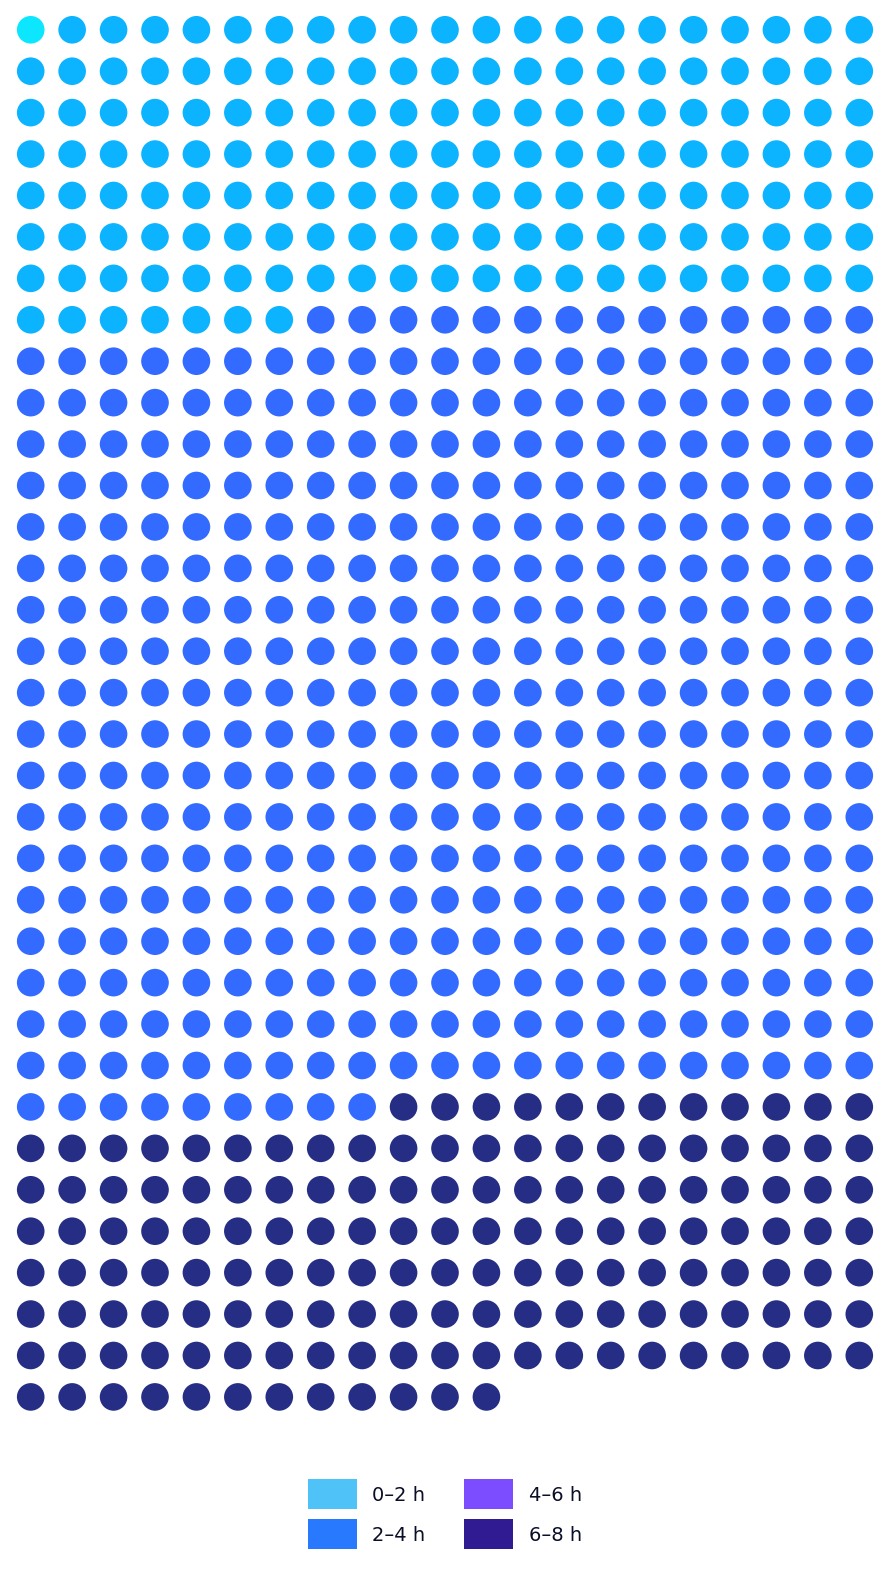

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ------------------------------------------------------------
# 0. DATA: assumes df already exists with the column below
# ------------------------------------------------------------
# df is your DataFrame
hours = df['Avg_Daily_Usage_Hours'].values
#Use for adjust a bit the nr of dots
# hours = hours[:-3] 
# Sort hours from lowest to highest
sorted_indices = np.argsort(hours)
hours_sorted = hours[sorted_indices]


# Recompute mins/max
min_hours = hours.min()
max_hours = hours.max()

# ------------------------------------------------------------
# 1. USER-CONTROLLED INTERVALS (EDIT THIS BLOCK)
# ------------------------------------------------------------
# Example: 4 categories: 0–2 h, 2–4 h, 4–6 h, 6–8 h
# You can change these to any ascending sequence of numbers.
category_bounds = np.array([0, 2, 4, 6, 8])  # <-- EDIT THESE

# Number of categories is number of intervals between bounds
n_categories = len(category_bounds) - 1

# One color per interval (must match n_categories)
legend_elements = [
    mpatches.Patch(facecolor='#4FC3F7', label='0–2 h'),  # azul claro brillante
    mpatches.Patch(facecolor='#2979FF', label='2–4 h'),  # azul intenso
    mpatches.Patch(facecolor='#7C4DFF', label='4–6 h'),  # violeta medio saturado
    mpatches.Patch(facecolor='#311B92', label='6–8 h'),  # púrpura oscuro
]
# If you prefer automatic bounds instead, comment out the manual
# category_bounds above and uncomment this:
# n_categories = 4
# category_bounds = np.linspace(min_hours, max_hours, n_categories + 1)

# ------------------------------------------------------------
# 2. USER-CONTROLLED GRID & DOT SPACING (EDIT THIS BLOCK)
# ------------------------------------------------------------
cols = 21        # number of columns (more cols = fewer rows)
x_spacing = 0.009  # horizontal distance between dot centers
y_spacing = 0.009 # vertical distance between dot centers
circle_radius = 0.003  # dot radius (relative to spacing)

# ------------------------------------------------------------
# 3. CATEGORIZE HOURS INTO BINS
# ------------------------------------------------------------
# Digitize using inner cut points of your bounds
bins = category_bounds[1:-1]   # inner edges only
categories = np.digitize(hours_sorted, bins=bins)

# Safety: clip categories so they're always in [0, n_categories-1]
categories = np.clip(categories, 0, n_categories - 1)

# ------------------------------------------------------------
# 4. GRID DIMENSIONS
# ------------------------------------------------------------
n_entries = len(hours_sorted)
rows = int(np.ceil(n_entries / cols))

# ------------------------------------------------------------
# 5. FIGURE & AXIS SETUP
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(9, 18), facecolor='#0A0E27')
ax.set_facecolor('#0A0E27')

# ------------------------------------------------------------
# 6. PLOT THE DOT GRID
# ------------------------------------------------------------
for idx, (hour, category) in enumerate(zip(hours_sorted, categories)):
    row = idx // cols
    col = idx % cols

    # Apply spacing to get the dot position
    x = col * x_spacing
    y = (rows - row - 1) * y_spacing

    color = category_colors[category]

    circle = mpatches.Circle(
        (x, y),
        circle_radius,
        color=color,
        ec='none',
        alpha=0.95
    )
    ax.add_patch(circle)

# Axis limits adjusted to spacing
ax.set_xlim(-0.5 * x_spacing, (cols - 0.5) * x_spacing)
ax.set_ylim(-0.5 * y_spacing, (rows - 0.5) * y_spacing)
ax.set_aspect('equal')
ax.axis('off')





# ------------------------------------------------------------
# 8. TITLE & SUBTITLE, LEGEND
# ------------------------------------------------------------
legend_elements = [
    mpatches.Patch(facecolor='#4FC3F7', label='0–2 h'),  # azul claro brillante
    mpatches.Patch(facecolor='#2979FF', label='2–4 h'),  # azul intenso
    mpatches.Patch(facecolor='#7C4DFF', label='4–6 h'),  # violeta medio saturado
    mpatches.Patch(facecolor='#311B92', label='6–8 h'),  # púrpura oscuro
]

legend = ax.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.02),
    ncol=2,
    frameon=False,
    fontsize=14,           # bigger text
    labelcolor='#0A0E27',
    handlelength=2.5,      # bigger color box width
    handleheight=2.0,      # bigger color box height
    borderpad=1.2,         # extra padding around legend items
)
# avg_hours = hours_sorted.mean()
# median_hours = np.median(hours_sorted)

# plt.suptitle(
#     'Social Media Screen Time',
#     color='#0A0E27',
#     fontsize=18,
#     fontweight='bold',
#     y=0.98
# )

# subtitle = (
#     f'{n_categories} Categories | '
#     f'Average: {avg_hours:.2f}h | '
#     f'Median: {median_hours:.2f}h'
# )

# plt.text(
#     0.5, 0.95, subtitle,
#     transform=fig.transFigure,
#     ha='center',
#     color='#0A0E27',
#     fontsize=10
# )

plt.tight_layout()

# ------------------------------------------------------------
# 9. DIAGNOSTIC PRINTS
# ------------------------------------------------------------
print("✓ Visualization created successfully!")
print(f"✓ Total entries: {n_entries}")
print(f"✓ Grid dimensions: {rows} rows × {cols} columns")
print(f"✓ Number of categories: {n_categories}")
print(f"✓ Manual screen time bounds: {category_bounds[0]:.2f} - {category_bounds[-1]:.2f} hours")
print(f"✓ Actual screen time range in data: {min_hours:.2f} - {max_hours:.2f} hours")
# print(f"✓ Average screen time: {avg_hours:.2f} hours")
print("✓ Using discrete color categories with custom intervals")


# Make figure transparent
fig.patch.set_alpha(0)
ax.set_facecolor((0,0,0,0))  # transparent axis background

# Export PNG with transparency
plt.savefig(
    "screen_time_transparent.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0,
    transparent=True
)

print("✓ Exported as transparent PNG successfully!")


✓ PNG exported to: screen_time.png


<Figure size 640x480 with 0 Axes>

## SPYDER GRAPH

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def spider(values, max_vals, filename="spider.png"):
    n = len(values)
    angles = np.linspace(0, 2*np.pi, n, endpoint=False).tolist() + [0]
    vals = [v/m for v, m in zip(values, max_vals)] + [values[0]/max_vals[0]]
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Make backgrounds transparent
    fig.patch.set_alpha(0)
    ax.patch.set_alpha(0)

    # Grid lines
    for lvl in np.linspace(0.2, 1, 5):
        ax.plot(angles, [lvl]*len(angles), color='#ccc', lw=0.8, ls='--')
    for a in angles[:-1]:
        ax.plot([a, a], [0, 1], color='#ccc', lw=0.8, ls='--')

    # Spider fill + outline
    ax.fill(angles, vals, color="#c49251", alpha=0.5)
    ax.plot(angles, vals, color="#8a888a", lw=2)

    # Remove ticks and frame
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['polar'].set_visible(False)
    ax.set_ylim(0, 1)

    plt.tight_layout()

    # Display in notebook
    plt.show()

    # Save with transparent background
    fig.savefig(filename, transparent=True, dpi=300)
    print(f"Saved as {filename}")




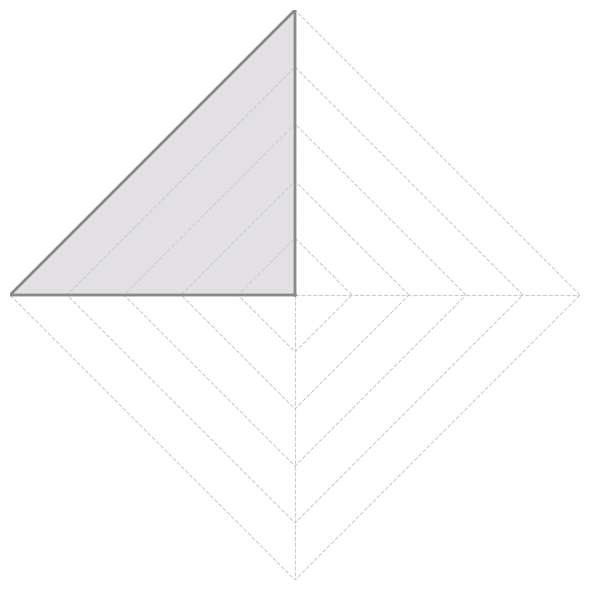

Saved as spider_6.png


In [96]:
max_values = [10, 10, 10, 10]
spider([0, 10, 10, 0], max_values, f"spider_{n}.png")

In [85]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')


--- Student 1 ---
Avg_Daily_Usage_Hours: 5.8
Sleep_Hours_Per_Night: 6.6
Conflicts_Over_Social_Media: 3
Addicted_Score: 7
Mental_Health_Score: 6
values array: [5.8, 6.6, 3, 7]


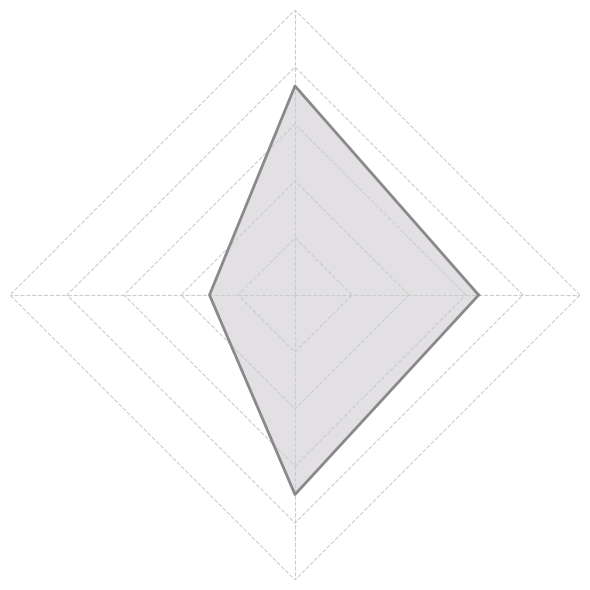

Saved as spider_1.png

--- Student 2 ---
Avg_Daily_Usage_Hours: 4.6
Sleep_Hours_Per_Night: 7.3
Conflicts_Over_Social_Media: 3
Addicted_Score: 7
Mental_Health_Score: 6
values array: [4.6, 7.3, 3, 7]


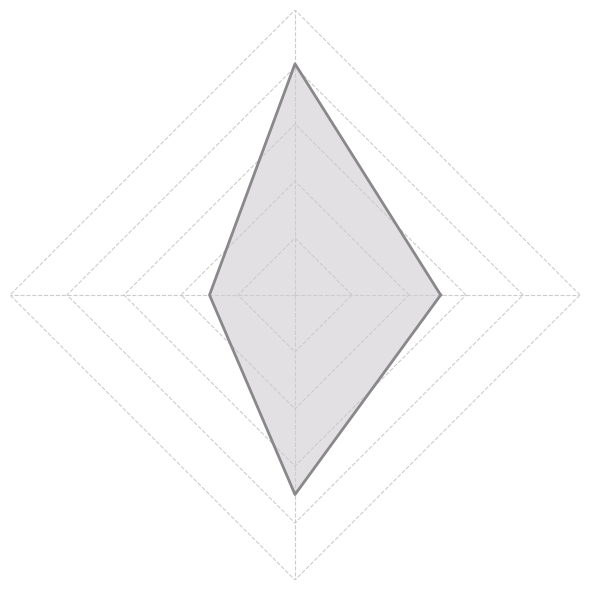

Saved as spider_2.png

--- Student 3 ---
Avg_Daily_Usage_Hours: 2.9
Sleep_Hours_Per_Night: 8.7
Conflicts_Over_Social_Media: 1
Addicted_Score: 3
Mental_Health_Score: 8
values array: [2.9, 8.7, 1, 3]


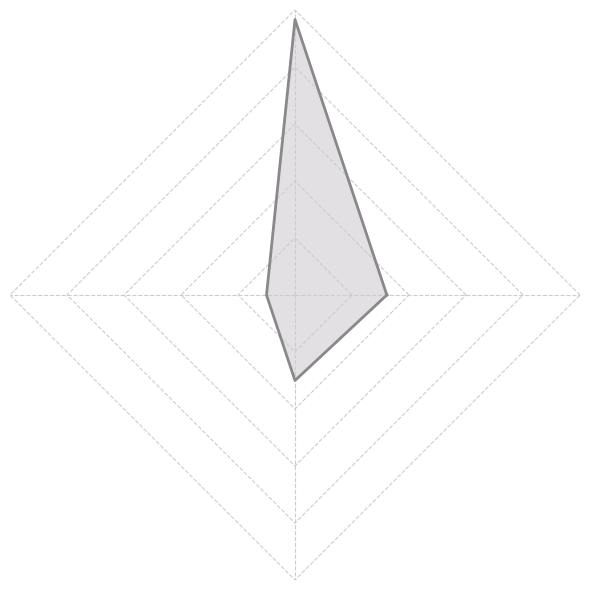

Saved as spider_3.png

--- Student 4 ---
Avg_Daily_Usage_Hours: 6.6
Sleep_Hours_Per_Night: 5.7
Conflicts_Over_Social_Media: 4
Addicted_Score: 8
Mental_Health_Score: 5
values array: [6.6, 5.7, 4, 8]


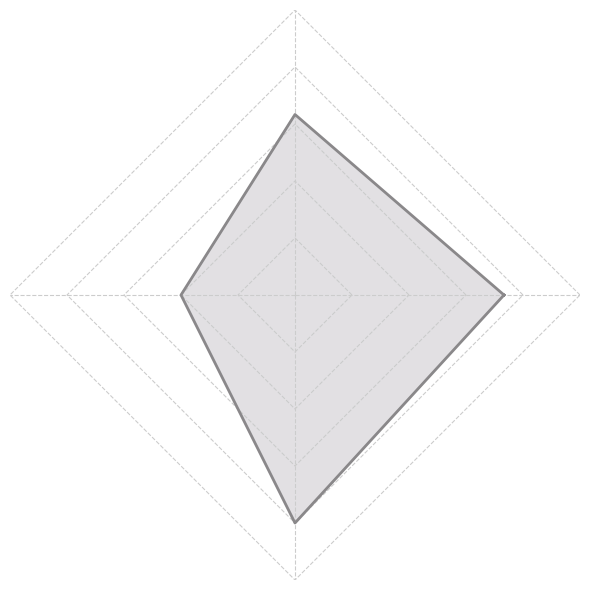

Saved as spider_4.png

--- Student 5 ---
Avg_Daily_Usage_Hours: 6.1
Sleep_Hours_Per_Night: 7.2
Conflicts_Over_Social_Media: 4
Addicted_Score: 7
Mental_Health_Score: 5
values array: [6.1, 7.2, 4, 7]


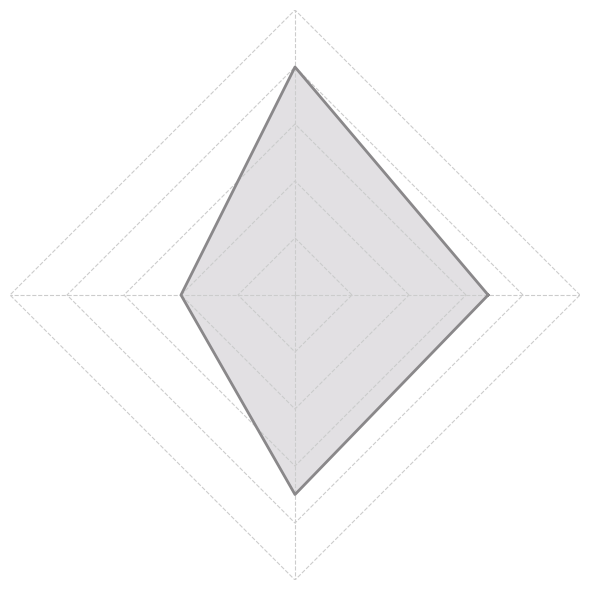

Saved as spider_5.png

--- Student 6 ---
Avg_Daily_Usage_Hours: 6.8
Sleep_Hours_Per_Night: 5.3
Conflicts_Over_Social_Media: 4
Addicted_Score: 9
Mental_Health_Score: 4
values array: [6.8, 5.3, 4, 9]


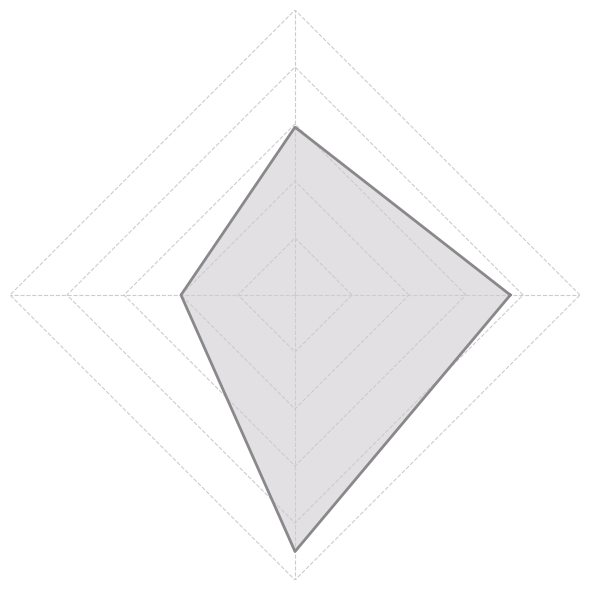

Saved as spider_6.png


In [97]:
cols = [
    "Avg_Daily_Usage_Hours",
    "Sleep_Hours_Per_Night",
    "Conflicts_Over_Social_Media",
    "Addicted_Score"
]

extra_col = "Mental_Health_Score"   # printed only

df1 = df.sample(6)

max_values = [9, 9, 10, 10]

for n, (_, row) in enumerate(df1.iterrows(), start=1):

    # Values for the spider chart (ONLY the 4 columns)
    values = row[cols].tolist()

    print(f"\n--- Student {n} ---")

    # Print the 4 spider variables
    for col in cols:
        print(f"{col}: {row[col]}")

    # Print the extra variable (NOT used for spider)
    print(f"{extra_col}: {row[extra_col]}")

    # Also print the values array
    print("values array:", values)

    # Call your existing spider function
    spider(values, max_values, f"spider_{n}.png")


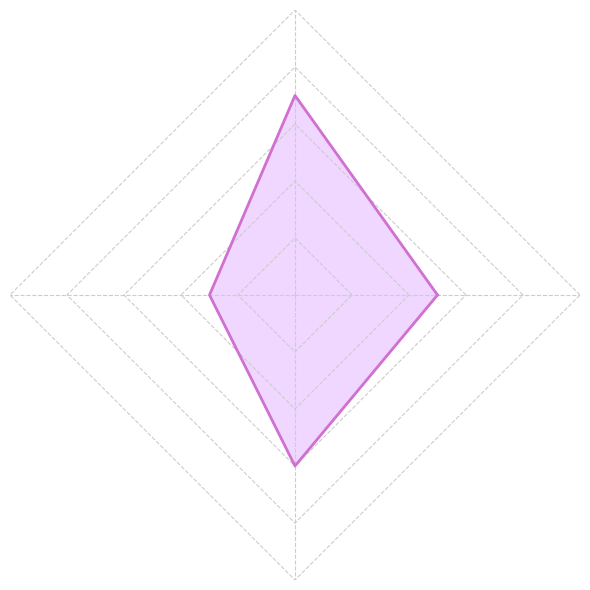

Saved as spider_transparent.png


In [ ]:
df1 = df.sample


spider([5, 7, 3, 6], [10, 10, 10, 10], "spider_transparent.png")

In [84]:
df.sample(5)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
174,175,20,Female,Undergraduate,Nepal,5.7,TikTok,Yes,5.6,6,Single,4,8
91,92,19,Female,Undergraduate,Albania,4.7,TikTok,Yes,5.8,6,Complicated,3,7
138,139,19,Male,Undergraduate,Sri Lanka,5.3,TikTok,Yes,5.3,6,Single,3,7
176,177,19,Female,Undergraduate,Sri Lanka,4.9,Facebook,No,7.5,7,Single,2,5
647,648,23,Male,Graduate,Canada,5.7,TikTok,Yes,6.6,6,Single,3,7
